# DABN13 - Assignment 1

This assignment comes in the form of a Jupyter notebook which you are supposed to fill in. All instances that require you input are marked by "??". Please replace that with the corresponding code for a given task. Additionally, you need to uncomment all commented ('#') lines in the code chunks below in order to make the script work. Moreover, note the following:

* Often, we have specified names for objects that you are supposed to create. Use them. Do not come up with any object names of your own.
* Tasks that require you to write a function will provide you with function name, all inputs to the function as well as the function output. Your task is to write operations within the function that work with these given parameters. 
* At times, you will be asked to use a specific function to complete a task. If this is the case, please follow instructions to the point. Do not implement any alternative  way of performing the task.
* Sometimes, you might have questions concerning the use of a specific function in python. Please approach this situation as in a real-life programming situation: First, use the documentation of the relevant python package to find an answer. If unsuccessful, use Google. If still unsuccessful, post your question in the discussion section of our course page on Canvas.
* Please write text answers into the corresponding string variables.

Before we start, we will need to load the libraries that we use. We will work with os, NumPy, Pandas and statsmodels. Please import them using the following code block.


In [1]:
import statsmodels.api as sm
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part one: Linear regression practice

In this basic section, we are goign to use the standard canned routines for linear regression in R.

### Load the data set

We will be working with `Guns.dta`, a Stata dataset containing yearly US state data between 1977 and 1999 of three different crime rates, a number of additional state characteristics, as well as an indicator for the existence of a "shall-carry" law that allows citizens to obtain a permission to wear concealed handguns. In the following, you will fit a simple predictive model for state-wide violent crime rates.

To begin with, use the `read_stata()` command in Pandas to load `Guns.dta` into a pandas dataframe called `Guns`


In [2]:
os.chdir('C:/Users/claes/OneDrive/Universitet/DataScience Magisterprogram/STAN51 - Maskininlärning ur ett regressionperspektiv/Inlamningar/Inlamning_1') # Change working directory here
Guns = pd.read_stata('Guns.dta')

In [3]:
print(Guns.describe())
print(Guns.info())

              year          vio          mur          rob  incarc_rate  \
count  1173.000000  1173.000000  1173.000000  1173.000000  1173.000000   
mean     88.000000   503.074707     7.665132   161.820206   226.579710   
std       6.636079   334.277039     7.522707   170.509842   178.888094   
min      77.000000    47.000000     0.200000     6.400000    19.000000   
25%      82.000000   283.100006     3.700000    71.099998   114.000000   
50%      88.000000   443.000000     6.400000   124.099998   187.000000   
75%      94.000000   650.900024     9.800000   192.699997   291.000000   
max      99.000000  2921.800049    80.599998  1635.099976  1913.000000   

            pb1064       pw1064       pm1029          pop       avginc  \
count  1173.000000  1173.000000  1173.000000  1173.000000  1173.000000   
mean      5.336217    62.945431    16.081129     4.816341    13.724796   
std       4.885688     9.761533     1.732143     5.252115     2.554542   
min       0.248207    21.780430    12

### Task 1a)
As a first task, we learn a linear regression using statsmodels. The statsmodels documentation on [linear regressions](https://www.statsmodels.org/stable/regression.html#module-reference) provides you with sufficient information to conduct this task.

First you need to define a linear regression object using the `OLS()`-function in statsmodels. To begin with, this object only defines the model inputs and outputs. Accordingly, `OLS()` requires you to specify the model output and the inputs as separate function arguments. It is best to create separate pandas dataframes `y_1a` and `X_1a` for output and inputs before using them for model training.

Now use `OLS()` to create a linear regression object with log violent crime rate as output and the following input variables:

* the logarithm of state population, 
* average per capita income, 
* shall-carry law in effect, 
* log murder rates, 
* log robbery rates, 
* an intercept 

Save this regression object as `lm_spec1a`.

Finally, learn the parameters of the regression model by applying the `fit()`-method to `lm_spec_1a` and save the resulting object as `lm_fit_1a`.

In [4]:
### Mutation
def log_transform(input_variable):
    return np.log(input_variable)

Guns['log_violent_crime'] = Guns['vio'].apply(log_transform)
Guns['log_pop'] = Guns['pop'].apply(log_transform)
Guns['log_murder'] = Guns['mur'].apply(log_transform)
Guns['log_robbery'] = Guns['rob'].apply(log_transform)

In [5]:
# 1.
y_1a = np.array(Guns['log_violent_crime'])
X_1a = Guns[['log_pop', 'avginc', 'shall', 'log_murder', 'log_robbery']]
X_1a = sm.add_constant(X_1a)

# 2.
lm_spec_1a = sm.OLS(y_1a, X_1a)

# 3.
lm_fit_1a  = lm_spec_1a.fit()

print(lm_fit_1a.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1375.
Date:                Wed, 06 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:18:31   Log-Likelihood:                -18.845
No. Observations:                1173   AIC:                             49.69
Df Residuals:                    1167   BIC:                             80.09
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.1392      0.050     63.255      

### Task 1b)
Least squares regression coefficients are saved inside ` lm_fit_1a ` as attribute `params`. Extract its content into a single 6x1 NumPy array `lm_coef_1b`. 

In [6]:
lm_coef_1b = lm_fit_1a.params
print(lm_coef_1b)

const          3.139204
log_pop       -0.028937
avginc         0.018960
shall          0.031720
log_murder     0.265249
log_robbery    0.464988
dtype: float64


### Task 1c)
In order to obtain training data predictions, we can apply the `predict()`-method to `lm_fit_1a`. The only argument you need to specify is the training inputs. Do this and save your predicted outputs as `lm_pred_1c`. 

The data for which we predict here is the same data used for model training. Accordingly, only need to specify one argument (i.e. input) for `predict()`. 

In [23]:
lm_pred_1c = lm_fit_1a.predict()

### Task 1d)
Model residuals can be manually constructed by subtracting training predictions from training outputs. Obtain the model residuals of the regression from Task 1a in this way and save it as `lm_res_1d`.

Additionally, residuals are saved inside the ` lm_fit_1a ` object. Use the `dir()`-function to report the names of all attributes within ` lm_fit_1a `. Save this vector of names as `lm_objnames`.

Lastly, calculate the sum of *squared* differences between the residuals that you find inside ` lm_fit_1a ` and `lm_res_1d`.

In [25]:
# 1D
## Residuals vs fitted

lm_res_1d = lm_fit_1a.resid

lm_objnames = dir(lm_fit_1a)

diff_res = sum(lm_res_1d**2)
print(diff_res)

70.92150274095505


## Task 1e)
A good prediction model for violent crime rates should capture all systematic patterns in the variation of this variable. A simple, but very effective way of finding out whether this is the case is to look at residual plots. If model residuals look like more than completely random noise, then there must be patterns left that we can exploit. Conduct the following steps: 

1. Create a pandas data frame `plotdata_1e` that contains training data predictions and residuals from `lm_fit1a`.
2. Complete the code chunk that applies the `scatter`-method on `ax_1e` by making appropriate replacements for `??`. We want a plot that has model residuals from on the y-axis and outcome predictions on the x-axis.
3.  Do you see any remaining systematic patterns in the data? Write your well-motivated answer into the string variable `rem_patterns1e`.

The data seems 


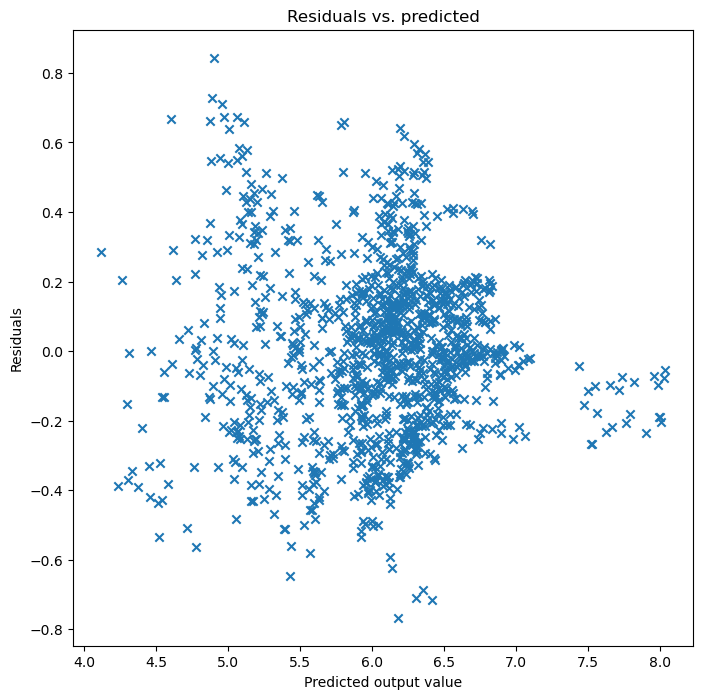

In [9]:
# 1.
plotdata_1e = pd.DataFrame({'predicted': lm_fit_1a.predict(), 'residuals': lm_fit_1a.resid})

# 2.
from matplotlib.pyplot import subplots
fig_1e, ax_1e = subplots(figsize = (8,8))
ax_1e.scatter(x='predicted', y='residuals', marker='x', data=plotdata_1e)
ax_1e.set_xlabel("Predicted output value")
ax_1e.set_ylabel("Residuals")
plt.title('Residuals vs. predicted')

# 3.
rem_patterns1e = "The data seems " #Write answer as string variable
print(rem_patterns1e)

### Task 1f)
Let us proceed with another plot that should highlight an obvious source of unaccounted patterns in the data. Conduct the following steps:

1. Create a pandas data frame `plotdata_1f` which adds the variable `stateid` from `Guns` to `plotdata_1e`. 
2. Plot the model residuals (x-axis) against ` stateid` (y-axis).
3. Describe any patterns that you see or conclude that you don't see any. Irrespective of your choice, write your answer into the string variable `whatIsee_1f`

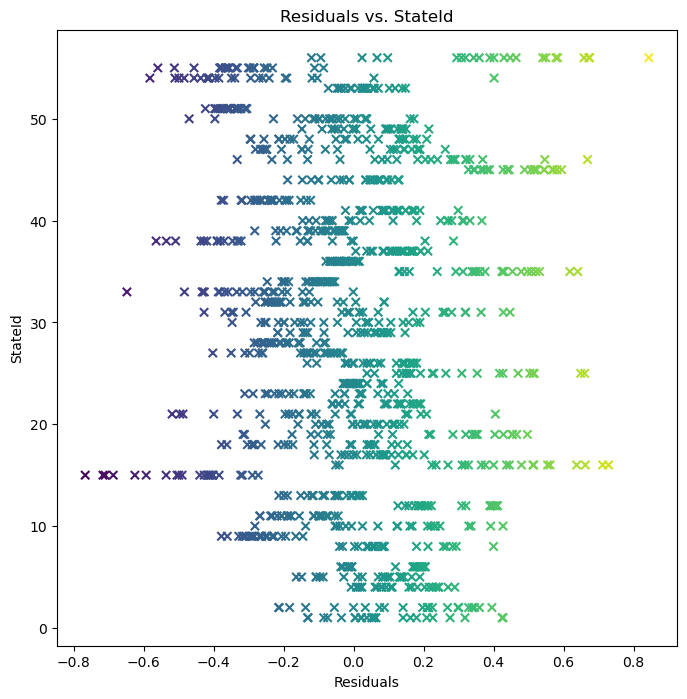

In [10]:
# 1.
plotdata_1f = pd.DataFrame({'predicted': lm_fit_1a.predict(), 'residuals': lm_fit_1a.resid, 'stateid':Guns['stateid'].astype(float)})

# 2.
fig_1f, ax_1f = subplots(figsize = (8,8))
ax_1f.scatter(x = 'residuals', y ='stateid', c = "residuals", marker = 'x', data = plotdata_1f)
plt.title('Residuals vs. StateId')
ax_1f.set_xlabel('Residuals')
ax_1f.set_ylabel('StateId')

# 3.
whatIsee1f = "??"


### Task 1g) 
`stateid` is a variable that want to add to our model specification in some form. Before doing this, use the `describe()` method on `Guns` to get some descriptive statistics and save them as object `summary_1g`. Use the `include` argument correctly to force python to provide information on variables of *any* data type.

You will see that a mean and a median are reported. Hence, as what type of variable is `stateid` apparently seen by R? Write your answer into the string variable `typeofvarb_1g`. 

Would it make sense to add `stateid` variable into our model from Task 1a) as it currently is? Why or why not? Write your answer into the string variable `in_regmodel_1g`.

In [11]:
summary_1g     = Guns.describe(include = 'all')
print(summary_1g)

typeofvarb_1g  = "int"
in_regmodel_1g = "??"

              year          vio          mur          rob  incarc_rate  \
count  1173.000000  1173.000000  1173.000000  1173.000000  1173.000000   
mean     88.000000   503.074707     7.665132   161.820206   226.579710   
std       6.636079   334.277039     7.522707   170.509842   178.888094   
min      77.000000    47.000000     0.200000     6.400000    19.000000   
25%      82.000000   283.100006     3.700000    71.099998   114.000000   
50%      88.000000   443.000000     6.400000   124.099998   187.000000   
75%      94.000000   650.900024     9.800000   192.699997   291.000000   
max      99.000000  2921.800049    80.599998  1635.099976  1913.000000   

            pb1064       pw1064       pm1029          pop       avginc  \
count  1173.000000  1173.000000  1173.000000  1173.000000  1173.000000   
mean      5.336217    62.945431    16.081129     4.816341    13.724796   
std       4.885688     9.761533     1.732143     5.252115     2.554542   
min       0.248207    21.780430    12

### Task 1h)
A tentative idea is to change `stateid` into a *category* variable. Perhaps `statmodels` reckognizes this and uses the individual categories as separate regressors. To see whether this actually happens, replace the variable `stateid` in `Guns` with a version if itself that is encoded as *category* variable. Use the `astype()` method for that. 

Next, get the summary statistics of this modified variable and save them as object `summary_1h`. 
What has changed? Write your answer into the string variable `whatchanged_1h`

In [12]:
Guns['stateid'] = Guns['stateid'].astype(str)
summary_1h      = Guns.describe()
print(summary_1h)
whatchanged1h = "??"

              year          vio          mur          rob  incarc_rate  \
count  1173.000000  1173.000000  1173.000000  1173.000000  1173.000000   
mean     88.000000   503.074707     7.665132   161.820206   226.579710   
std       6.636079   334.277039     7.522707   170.509842   178.888094   
min      77.000000    47.000000     0.200000     6.400000    19.000000   
25%      82.000000   283.100006     3.700000    71.099998   114.000000   
50%      88.000000   443.000000     6.400000   124.099998   187.000000   
75%      94.000000   650.900024     9.800000   192.699997   291.000000   
max      99.000000  2921.800049    80.599998  1635.099976  1913.000000   

            pb1064       pw1064       pm1029          pop       avginc  \
count  1173.000000  1173.000000  1173.000000  1173.000000  1173.000000   
mean      5.336217    62.945431    16.081129     4.816341    13.724796   
std       4.885688     9.761533     1.732143     5.252115     2.554542   
min       0.248207    21.780430    12

### Task 1i)
Create an input matrix `X_1i` that extends `X_1a` with the `stateid` variable as an additional column. Then, learn the regression model from Task 1a using our new input matrix `X_1i`. Use the `summary()` method to report a summary of the regression results. 
How has `statsmodels` included `stateid` into the model? Write your answer into the variable `howincluded_1i`

In [13]:
# 1.
X_1i = X_1a.assign(StateIdcat = Guns['stateid'])
X_1i['StateIdcat'] = pd.to_numeric(X_1i['StateIdcat'])
# 2.
lm_spec_1i = sm.OLS(y_1a, X_1i)
lm_fit_1i  = lm_spec_1i.fit()
print(lm_fit_1i.summary())

howincluded_1i = "??"

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1162.
Date:                Wed, 06 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:18:31   Log-Likelihood:                -11.321
No. Observations:                1173   AIC:                             36.64
Df Residuals:                    1166   BIC:                             72.11
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.2490      0.057     57.131      

### Task 1j)
The result of the previous task should have convinced you that we need to manually transform categorical input variables ourselves. Here, we are using the `get_dummies()` function in Pandas to achieve this goal. Use this function to transform `X_1i` into a dataset where the categorical variable `stateid` is replaced with indicator variables for its individual categories. Save this transformed input variable dataset as `X_1j`. Tell `get_dummies()` to drop the indicator variable for the first category in order to avoid the so-called *dummy-variable trap*.

Next, learn a linear regression using `X_1j` as your input variables and `y_1a` as the output variable. How does the regression output differ from that in Task 1i? Write your answer into `howoutputdiffers_1j`.

In [14]:
## 1.
X_1j = pd.get_dummies(X_1i, columns=['StateIdcat'], drop_first=True)
X_1j = sm.add_constant(X_1j)

## 2.
lm_spec_1j = sm.OLS(y_1a, X_1j)
lm_fit_1j  = lm_spec_1j.fit()

print(lm_fit_1j.summary())

howoutputdiffers_1j = "??"

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     557.8
Date:                Wed, 06 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:18:31   Log-Likelihood:                 813.23
No. Observations:                1173   AIC:                            -1514.
Df Residuals:                    1117   BIC:                            -1231.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.1276      0.111     28.056

## Part two: Least squares regression mechanics
In this more advanced section, you are supposed to create your own algorithms for some standard statistics of a fitted linear regression model from scratch. You are only allowed to use matrix and scalar operations like the NumPy functions

`@, matmul(), transpose(), linalg.solve(), linalg.inv(), subtract(), sum(), mean()`

(or their shortcuts) to manually produce results otherwise produced by `statmodels`.

### Task 2a)
Build a function that takes the two-dimensional NumPy arrays `X` and  `y` as its two arguments  and that returns the least squares
estimate $\hat{\beta}$ of the slope coefficients on `X`.

In [15]:
def get_betas(y, X):
    """
    Calculate the least squares estimate 𝛽̂ for simple linear regression.

    Parameters:
    X (numpy.ndarray): Two-dimensional array of feature values (independent variable).
    y (numpy.ndarray): One-dimensional array of target values (dependent variable).

    Returns:
    beta_hat (numpy.ndarray): Array of estimated slope coefficients.
    
    Estimering av koefficienter görs av: (X'X)^-1*X'Y
    """
    # Transpose av X
    X_trans = np.array(X).transpose()
    
    # Beräkning X^TX
    XTX = np.matmul(X_trans, np.array(X))
    
    # Beräkning av inversen X^TX
    XTX_inv = np.linalg.inv(XTX)
    
    # Beräkna X^TY
    XTY = np.matmul(X_trans, y)
    
    # Estimate the coefficients
    coefficients = np.matmul(XTX_inv, XTY)

    return coefficients

### Task 2b)
Build a function that computes the model residuals as an object called `res`. Refer to the function written in Task 2a to get an estimate of the slope coefficients.

In [26]:
def res(y,X):
    """
    Parameters
    ----------
    y : np.array()
        Observerade värden.
    X : np.array()
        Input-variabler av observerad data.
    coefficients : np.array()
        Estimering av koefficienter.

    Returns
    -------
    Residuals

    """
    predicted = np.dot(X, get_betas(y, X))
    observed = y
    res = observed - predicted
    return res

### Task 2c) 
Build a function that computes $R^2$, i.e. the estimated proportion of variance of $y$ that is explained by the model inputs. Refer to the function written in Task 2b to get model residuals. 

In [27]:
def get_r2(y, X):
    """
    Parameters
    ----------
    y : np.array()
        Observerade värden.
    X : np.array()
        Input-variabler av observerad data.

    Returns
    -------
    R^2 statistic.

    """
    residuals = res(y, X)
    residuals_squared = residuals**2
    y_observed = y
    y_mean = y.mean()
    y_mean_squared = (y_observed - y_mean)**2
    
    r2 = 1 - ( sum(residuals_squared)/ sum((y_mean_squared)) )
    
    return r2

### Task 2d)
Next, prepare the inputs that we can feed into our functions. Transform the Pandas data frames `y_1a` and `X_1a` into two-dimensional NumPy arrays and save them as `y_2d` and `X_2d`, respectively.

Then, use your function from Task 2a to learn the coefficient of a linear regression of `y_2d` on `X_2d` and save them as `lm_coef_2d`.

In [28]:
# 1.
y_2d       = y_1a.reshape(-1, 1)
X_2d       = X_1a.values

# 2.
lm_coef_2d = get_betas(y_2d,X_2d)
print(lm_coef_2d)

[[ 3.13920377]
 [-0.02893736]
 [ 0.0189599 ]
 [ 0.03172033]
 [ 0.26524857]
 [ 0.46498794]]


### Task 2e)
To what degree did the degree to which we picked up variation in the training data increase when we included state indicators? We are going to find that out by comparing $R^2$. First, transform the Pandas data frame `X_1j` into a Numpy array and save it as `X_2e`

Then, use the function from Task 2c to obtain the training $R^2$ for a regression model with inputs `X_2d` and for a model with inputs `X_2e`. Save them as `R2_nostate_2e` and `R2_withstate_2e` respectively.

Lastly, use the string variable `effect_of_stateid2e` to explain how much $R^2$ changed due to the use of state indicators as additional inputs.

In [30]:
# 1.
X_2e                = X_1j.values

# 2.
R2_nostate_2e = get_r2(y_1a, X_2d)
R2_withstate_2e = get_r2(y_1a, X_2e)
print((R2_withstate_2e, R2_nostate_2e))

# 3.
effect_of_stateid2e = "??"

(0.964871672181144, 0.8548568958434951)
